# Polynomial Regression Exercises

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Problem 1: Creating and Visualizing data for 1 feature model

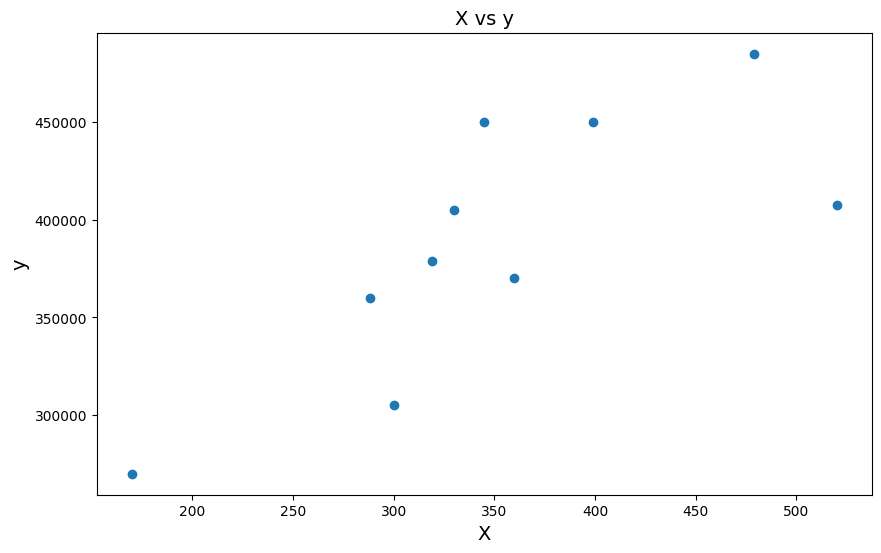

In [3]:
#Making and visualizing data
#X=np.array([1,2,3,4,5]).reshape(-1,1)
#y=np.array([20, 45, 56, 64, 70]).reshape(-1,1)
X=np.array([300,170,288,360,319,330,520,345,399,479]).reshape(-1,1)
y=np.array([305000,270000,360000,370000,379000,405000,407500,450000,450000,485000]).reshape(-1,1)

#Plotting the data
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.show()

- In the above plot we can see that distribution of data is somewhat non-linear.

### Model 1: Linear Regression
$$y=\theta_0+\theta_1X$$

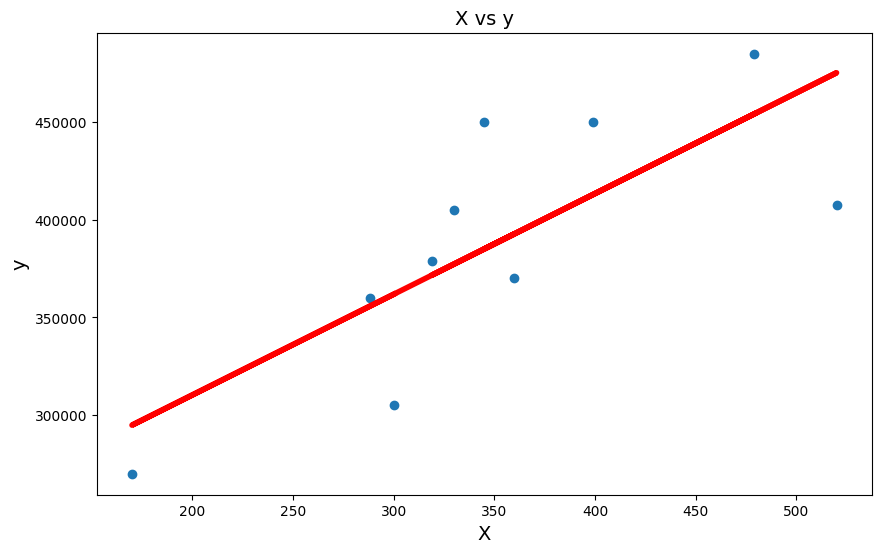

R_square score: 0.5889136638652293
theta_0: 207241.3942514915
theta_1: 515.4091331866339
Number of non-zero features: 1
CPU times: user 63.7 ms, sys: 4.9 ms, total: 68.7 ms
Wall time: 71.5 ms


In [4]:
%%time

model1=LinearRegression()
model1.fit(X,y)

#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.plot(X,model1.predict(X),color='red',linewidth=4)
plt.show()

print('R_square score:',model1.score(X,y))
print('theta_0:',model1.intercept_[0])
print('theta_1:',model1.coef_[0][0])
print('Number of non-zero features:',np.sum(model1.coef_ != 0))

### Model 2: Polynomial Regression with degree 2 polynomial
$$y=\theta_0+\theta_1X+\theta_2X^2$$

The implementation of polynomial regression is a two-step process. 
First, we transform our data into a polynomial using the PolynomialFeatures function from sklearn and,
then use linear regression to fit the parameters.

In [5]:
#Converting linear function to polynomial function of degree 2
poly2 = PolynomialFeatures(degree=2)
X_poly2 = poly2.fit_transform(X)
#X_poly is ndarray having three columns: 
#First one is a constant to represent X_0, 
#Second is X_1=X 
#Third is X_2=X**2, simply square of X
X_poly2

array([[1.00000e+00, 3.00000e+02, 9.00000e+04],
       [1.00000e+00, 1.70000e+02, 2.89000e+04],
       [1.00000e+00, 2.88000e+02, 8.29440e+04],
       [1.00000e+00, 3.60000e+02, 1.29600e+05],
       [1.00000e+00, 3.19000e+02, 1.01761e+05],
       [1.00000e+00, 3.30000e+02, 1.08900e+05],
       [1.00000e+00, 5.20000e+02, 2.70400e+05],
       [1.00000e+00, 3.45000e+02, 1.19025e+05],
       [1.00000e+00, 3.99000e+02, 1.59201e+05],
       [1.00000e+00, 4.79000e+02, 2.29441e+05]])

In [6]:
#Converting ndarray to DataFrame and dropping the constant (first column)
X_poly2=pd.DataFrame(X_poly2)
X_poly2=X_poly2.drop([0],axis=1)
X_poly2

,1,2
0,300.0,90000.0
1,170.0,28900.0
2,288.0,82944.0
3,360.0,129600.0
4,319.0,101761.0
5,330.0,108900.0
6,520.0,270400.0
7,345.0,119025.0
8,399.0,159201.0
9,479.0,229441.0


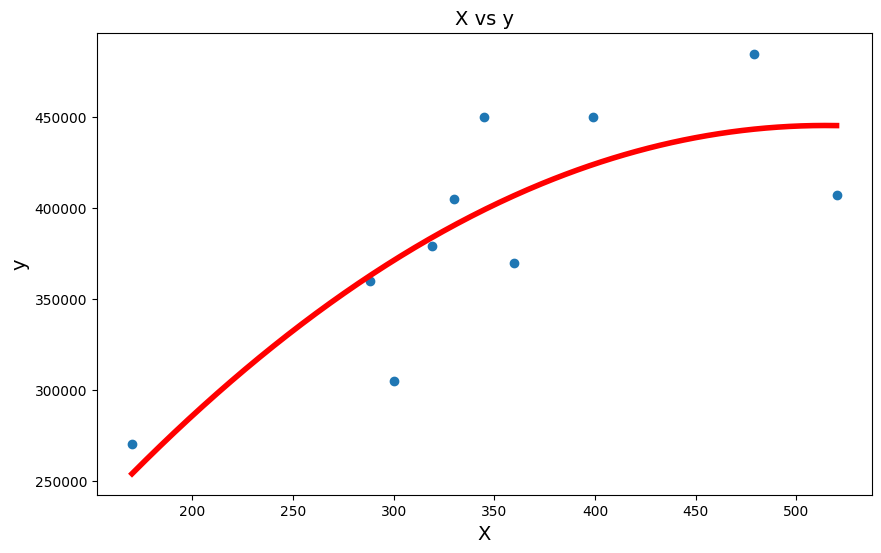

R_squared score: 0.6810985878421545
theta_0: 18030.177831701818
theta_1: [ 1.66223492e+03 -1.61588516e+00]
Number of non-zero features: 2


In [7]:
#now X_poly has two feature: X_1=X and X_2=X**2

#now fitting linear model to it
model2=LinearRegression()
model2.fit(X_poly2,y)

#generating data for line plot, for smoother curve
X_data=np.linspace(X.min(),X.max(),300).reshape(-1,1) 
X_data_poly2 = pd.DataFrame(poly2.fit_transform(X_data)).drop([0],axis=1)
X_data_poly2


#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
#plt.plot(X,model2.predict(X_poly2),color='red',linewidth=4)
plt.plot(X_data,model2.predict(X_data_poly2),color='red',linewidth=4)
plt.show()

print('R_squared score:',model2.score(X_poly2,y))
print('theta_0:',model2.intercept_[0])
print('theta_1:',model2.coef_[0])
print('Number of non-zero features:',np.sum(model2.coef_ != 0))

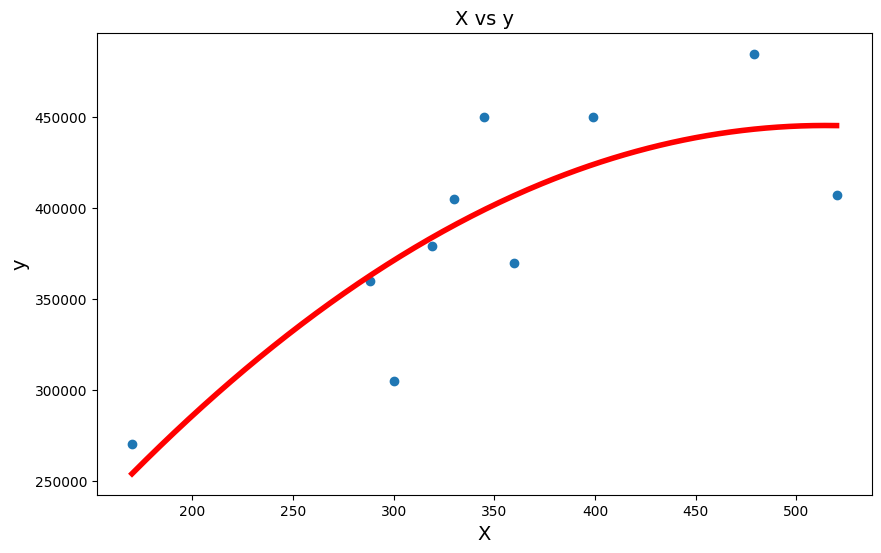

R_square score: 0.6810985878421547
CPU times: user 69.9 ms, sys: 3.46 ms, total: 73.4 ms
Wall time: 73.3 ms


In [8]:
%%time

#An alternate, shorter form form Model 2
model2a=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
model2a.fit(X,y)

#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.plot(X_data,model2a.predict(X_data),color='red',linewidth=4)
plt.show()

print('R_square score:',model2a.score(X,y))

### Model 3: Polynomial Regression with degree 9 polynomial
$$y=\theta_0+\theta_1X+\theta_2X^2+\theta_3X^3+\theta_4X^4+\theta_5X^5+\theta_6X^6+\theta_7X^7+\theta_8X^8+\theta_9X^9$$


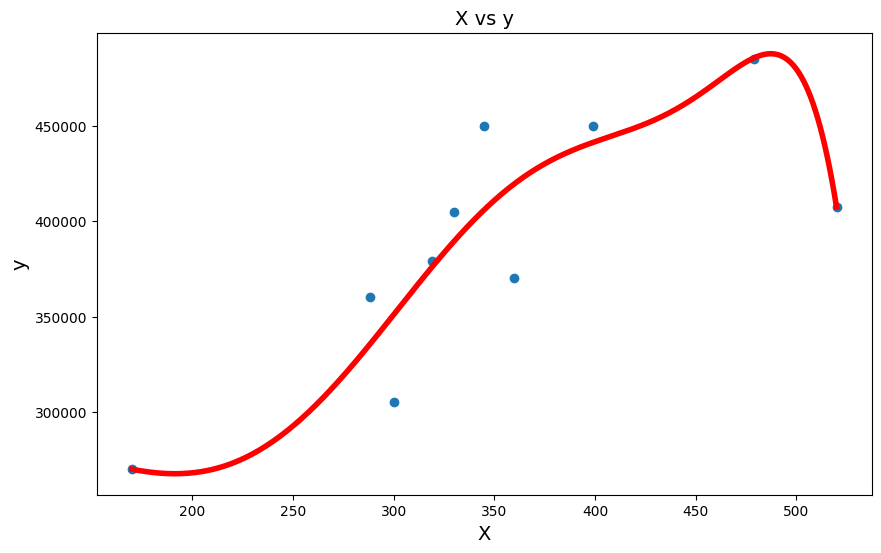

R_square score: 0.812571370145189
theta_0: 295022.4427469075
theta_1: [-2.31482856e-15 -6.18679596e-09 -1.54146316e-10 -2.27473823e-08
 -1.93271601e-06  1.95447596e-08 -7.17981984e-11  1.15113306e-13
 -6.83731050e-17]
Number of non-zero features: 9
CPU times: user 67.1 ms, sys: 2.54 ms, total: 69.6 ms
Wall time: 69 ms


In [9]:
%%time

#Converting linear function to polynomial function of degree 9 using the longer method

poly3 = PolynomialFeatures(degree=9)
X_poly3 = poly3.fit_transform(X)

X_poly3=pd.DataFrame(X_poly3)
X_poly3=X_poly3.drop([0],axis=1)

model3=LinearRegression()
model3.fit(X_poly3,y)

#Generating data for line plot, for smoother curve
X_data=np.linspace(X.min(),X.max(),300).reshape(-1,1) 
X_data_poly3 = pd.DataFrame(poly3.fit_transform(X_data)).drop([0],axis=1)

#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.plot(X_data,model3.predict(X_data_poly3),color='red',linewidth=4)
plt.show()

print('R_square score:',model3.score(X_poly3,y))
print('theta_0:',model3.intercept_[0])
print('theta_1:',model3.coef_[0])
print('Number of non-zero features:',np.sum(model3.coef_ != 0))

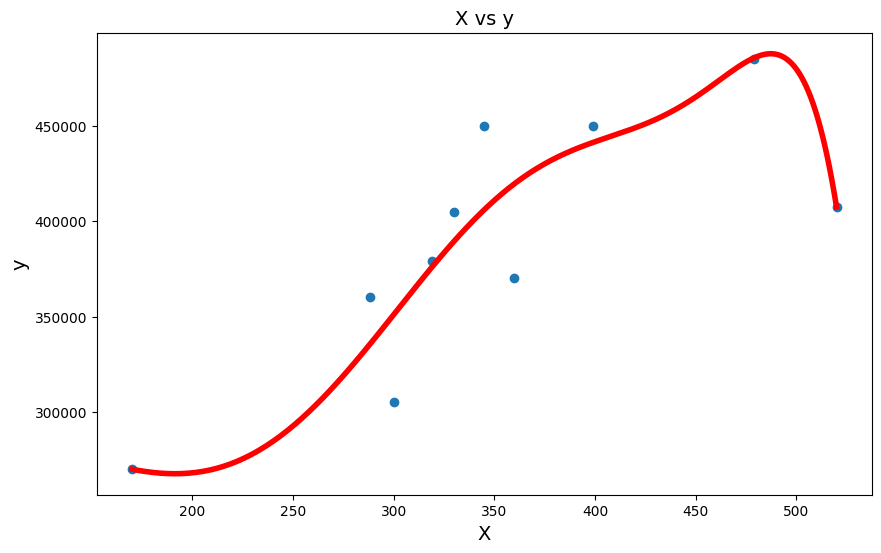

R_squared score: 0.8125713702256312
CPU times: user 82.2 ms, sys: 6.08 ms, total: 88.2 ms
Wall time: 120 ms


In [10]:
%%time

#An alternate, shorter form form Model 3
model3a=make_pipeline(PolynomialFeatures(degree=9),LinearRegression())
model3a.fit(X,y)

#Plotting the fit line over the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.title('X vs y',fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.plot(X_data,model3a.predict(X_data),color='red',linewidth=4)
plt.show()

print('R_squared score:',model3a.score(X,y))

## Problem 2: Creating and Visualizing data for Multi-feature model
### Revisiting the Boston house pricing example again

- Refer to notebook 'N4_Data Preprocessing and Feature Engineeing_4.ipynb' for preliminary details on this dataset.
- The models in Problem 2 are number 4 and 5 just to avoid name clashes with models of problem 1.

In [12]:
#Loading and visualizing data
boston_dataset = pd.read_csv('Datasets/Boston_Dataset.csv')
dataset = pd.DataFrame(data=boston_dataset)

#Creating a series for the target
target=boston_dataset['PRICE']

#Creating a dataframe for the features
features=boston_dataset.drop(['PRICE'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)

### Model 4: Linear Regression

In [13]:
%%time

model4 = LinearRegression()
model4.fit(X_train, y_train)

print('Training data r-square:', model4.score(X_train, y_train))
print('Test data r-square:', model4.score(X_test, y_test))
print('Number of non-zero features:',np.sum(model4.coef_ != 0))

Training data r-square: 0.750121534530608
Test data r-square: 0.6709339839115637
Number of non-zero features: 13
CPU times: user 7.09 ms, sys: 2.73 ms, total: 9.81 ms
Wall time: 9.34 ms


### Model 5: Polynomial Regression 

In [14]:
%%time

deg=9 #try 3
X_train_poly2=PolynomialFeatures(degree=deg).fit_transform(X_train)
X_train_poly2=pd.DataFrame(X_train_poly2)
X_train_poly2=X_train_poly2.drop([0],axis=1)
model5=LinearRegression()
model5.fit(X_train_poly2,y_train)

print('Training data r-square:', model5.score(X_train_poly2, y_train))
X_test_poly2=PolynomialFeatures(degree=deg).fit_transform(X_test)
X_test_poly2=pd.DataFrame(X_test_poly2)
X_test_poly2=X_test_poly2.drop([0],axis=1)
print('Test data r-square:', model5.score(X_test_poly2, y_test))
print('Number of non-zero features:',np.sum(model5.coef_ != 0))

Training data r-square: 1.0
Test data r-square: -412.1731992066534
Number of non-zero features: 497419
CPU times: user 1min 28s, sys: 22.1 s, total: 1min 50s
Wall time: 1min


# Q6.
For model 5 implementation of the notebook N6_Ploynomial Regression.ipynb, set the variable deg to 3 and then 9.
Observe the wall-times, number of non-zero features and R-squared scores in both cases.

In [15]:
%%time

deg=3
X_train_poly2=PolynomialFeatures(degree=deg).fit_transform(X_train)
X_train_poly2=pd.DataFrame(X_train_poly2)
X_train_poly2=X_train_poly2.drop([0],axis=1)
model5=LinearRegression()
model5.fit(X_train_poly2,y_train)

print('Training data r-square:', model5.score(X_train_poly2, y_train))
X_test_poly2=PolynomialFeatures(degree=deg).fit_transform(X_test)
X_test_poly2=pd.DataFrame(X_test_poly2)
X_test_poly2=X_test_poly2.drop([0],axis=1)
print('Test data r-square:', model5.score(X_test_poly2, y_test))
print('Number of non-zero features:',np.sum(model5.coef_ != 0))

Training data r-square: 0.9999999999999993
Test data r-square: -985.6904206593829
Number of non-zero features: 559
CPU times: user 51 ms, sys: 28.9 ms, total: 79.9 ms
Wall time: 78.1 ms
